In [5]:
import pandas as pd

# Load your dataset
df = pd.read_csv("credit_card_fraud.csv")

# Show all columns, but only the first 5 rows
print(df.head())
import pandas as pd

# Load your dataset
df = pd.read_csv("credit_card_fraud.csv")

# Show all columns, but only the first 5 rows
print(df.head())


  trans_date_trans_time                   merchant       category     amt  \
0   2019-01-01 00:00:44  Heller, Gutmann and Zieme    grocery_pos  107.23   
1   2019-01-01 00:00:51             Lind-Buckridge  entertainment  220.11   
2   2019-01-01 00:07:27                  Kiehn Inc    grocery_pos   96.29   
3   2019-01-01 00:09:03                Beier-Hyatt   shopping_pos    7.77   
4   2019-01-01 00:21:32                 Bruen-Yost       misc_pos    6.85   

                       city state      lat      long  city_pop  \
0                    Orient    WA  48.8878 -118.2105       149   
1                Malad City    ID  42.1808 -112.2620      4154   
2                   Grenada    CA  41.6125 -122.5258       589   
3  High Rolls Mountain Park    NM  32.9396 -105.8189       899   
4                   Freedom    WY  43.0172 -111.0292       471   

                                 job         dob  \
0  Special educational needs teacher  1978-06-21   
1        Nature conservation officer

In [6]:
print(df.columns)

Index(['trans_date_trans_time', 'merchant', 'category', 'amt', 'city', 'state',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'merch_lat',
       'merch_long', 'is_fraud'],
      dtype='object')


In [7]:
# Drop the unnecessary columns
df.drop(columns=['merchant', 'city', 'state', 'job', 'trans_num'], inplace=True)
# Confirm the remaining columns
print(df.columns)

Index(['trans_date_trans_time', 'category', 'amt', 'lat', 'long', 'city_pop',
       'dob', 'merch_lat', 'merch_long', 'is_fraud'],
      dtype='object')


In [8]:
# Show the first 5 rows after dropping the columns
print(df.head())

  trans_date_trans_time       category     amt      lat      long  city_pop  \
0   2019-01-01 00:00:44    grocery_pos  107.23  48.8878 -118.2105       149   
1   2019-01-01 00:00:51  entertainment  220.11  42.1808 -112.2620      4154   
2   2019-01-01 00:07:27    grocery_pos   96.29  41.6125 -122.5258       589   
3   2019-01-01 00:09:03   shopping_pos    7.77  32.9396 -105.8189       899   
4   2019-01-01 00:21:32       misc_pos    6.85  43.0172 -111.0292       471   

          dob  merch_lat  merch_long  is_fraud  
0  1978-06-21  49.159047 -118.186462         0  
1  1962-01-19  43.150704 -112.154481         0  
2  1945-12-21  41.657520 -122.230347         0  
3  1967-08-30  32.863258 -106.520205         0  
4  1967-08-02  43.753735 -111.454923         0  


In [12]:
# List of remaining columns
remaining_cols = ['trans_date_trans_time', 'category', 'amt', 'lat', 'long', 'city_pop', 'dob', 'merch_lat', 'merch_long', 'is_fraud']

missing_values = df[remaining_cols].isnull().sum()

if missing_values.sum() == 0:
    print("No null values found in the dataset.")
else:
    print(missing_values[missing_values > 0])


No null values found in the dataset.


In [19]:
# Convert datetime columns
df['trans_date_trans_time'] = pd.to_datetime(df['trans_date_trans_time'])
df['dob'] = pd.to_datetime(df['dob'])

# Convert binary target to int (if not already)
df['is_fraud'] = df['is_fraud'].astype(int)

# Display the results
print("\nData types after conversion:")
print(df[['trans_date_trans_time', 'dob', 'is_fraud']].dtypes)

print("\nSample data after conversion:")
print(df[['trans_date_trans_time', 'dob', 'is_fraud']].head())


Data types after conversion:
trans_date_trans_time    datetime64[ns]
dob                      datetime64[ns]
is_fraud                          int32
dtype: object

Sample data after conversion:
  trans_date_trans_time        dob  is_fraud
0   2019-01-01 00:00:44 1978-06-21         0
1   2019-01-01 00:00:51 1962-01-19         0
2   2019-01-01 00:07:27 1945-12-21         0
3   2019-01-01 00:09:03 1967-08-30         0
4   2019-01-01 00:21:32 1967-08-02         0


In [21]:
# ---- FEATURE ENGINEERING ----

# 1. Age of the customer
df['age'] = df['trans_date_trans_time'].dt.year - df['dob'].dt.year

# 2. Transaction Hour
df['trans_hour'] = df['trans_date_trans_time'].dt.hour

# 3. Day of the Week (0=Monday, 6=Sunday)
df['trans_dayofweek'] = df['trans_date_trans_time'].dt.dayofweek

# 4. Is Weekend
df['is_weekend'] = df['trans_dayofweek'].apply(lambda x: 1 if x >= 5 else 0)

# 5. Transaction Month
df['trans_month'] = df['trans_date_trans_time'].dt.month

# 6. Is Night Transaction (0 AM to 6 AM)
df['is_night'] = df['trans_hour'].apply(lambda x: 1 if (0 <= x <= 6) else 0)

# 7. Amount per Age Ratio
df['amount_per_age'] = df['amt'] / (df['age'] + 1)  # +1 to avoid divide by zero

# 8. Category Fraud Rate Mapping (if 'category' column exists)
if 'category' in df.columns:
    category_fraud_rate = df.groupby('category')['is_fraud'].mean()
    df['category_fraud_rate'] = df['category'].map(category_fraud_rate)

# ---- OPTIONAL CLEANUP ----

# Drop original datetime columns (no longer needed after feature engineering)
df = df.drop(['trans_date_trans_time', 'dob'], axis=1)

# Preview the new dataframe
print("\n✅ Feature Engineering Complete. Sample Data:")
print(df.head())



✅ Feature Engineering Complete. Sample Data:
        category     amt      lat      long  city_pop  merch_lat  merch_long  \
0    grocery_pos  107.23  48.8878 -118.2105       149  49.159047 -118.186462   
1  entertainment  220.11  42.1808 -112.2620      4154  43.150704 -112.154481   
2    grocery_pos   96.29  41.6125 -122.5258       589  41.657520 -122.230347   
3   shopping_pos    7.77  32.9396 -105.8189       899  32.863258 -106.520205   
4       misc_pos    6.85  43.0172 -111.0292       471  43.753735 -111.454923   

   is_fraud  age  trans_hour  trans_dayofweek  is_weekend  trans_month  \
0         0   41           0                1           0            1   
1         0   57           0                1           0            1   
2         0   74           0                1           0            1   
3         0   52           0                1           0            1   
4         0   52           0                1           0            1   

   is_night  amount_per_age 

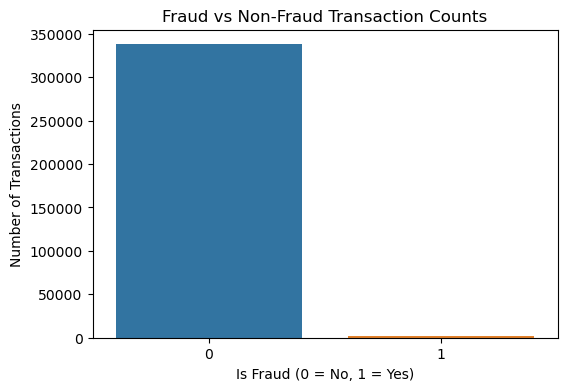

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot count of fraud vs non-fraud
plt.figure(figsize=(6,4))
sns.countplot(x='is_fraud', data=df)
plt.title('Fraud vs Non-Fraud Transaction Counts')
plt.xlabel('Is Fraud (0 = No, 1 = Yes)')
plt.ylabel('Number of Transactions')
plt.show()

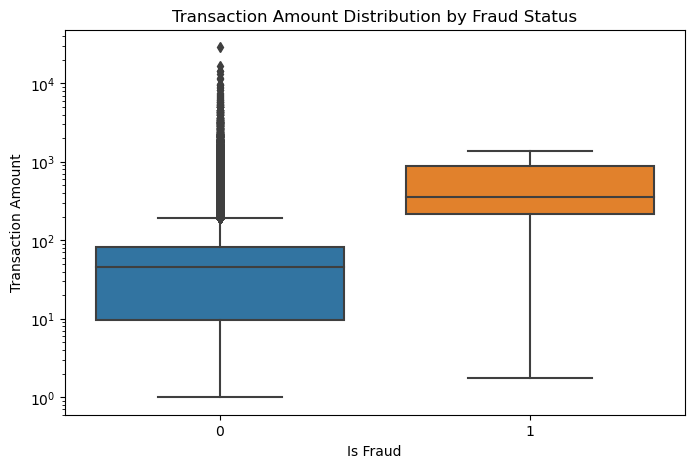

In [23]:
plt.figure(figsize=(8,5))
sns.boxplot(x='is_fraud', y='amt', data=df)
plt.title('Transaction Amount Distribution by Fraud Status')
plt.xlabel('Is Fraud')
plt.ylabel('Transaction Amount')
plt.yscale('log')  # Use log scale to handle outliers
plt.show()

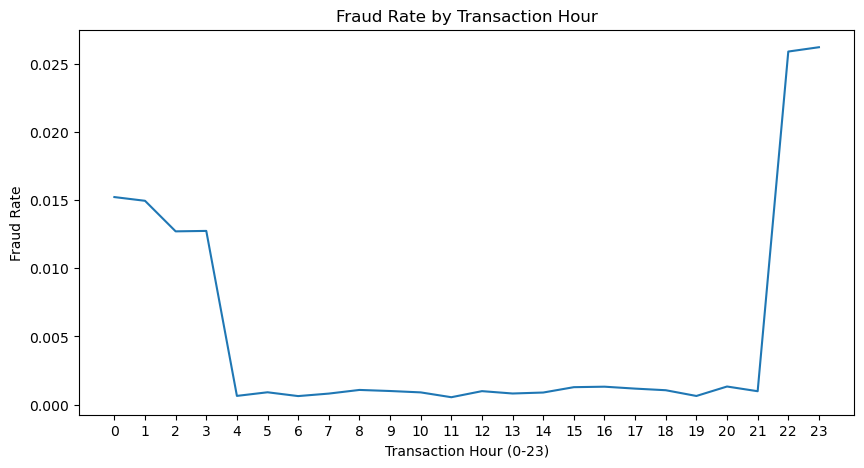

In [24]:
hour_fraud_rate = df.groupby('trans_hour')['is_fraud'].mean().reset_index()

plt.figure(figsize=(10,5))
sns.lineplot(x='trans_hour', y='is_fraud', data=hour_fraud_rate)
plt.title('Fraud Rate by Transaction Hour')
plt.xlabel('Transaction Hour (0-23)')
plt.ylabel('Fraud Rate')
plt.xticks(range(0,24))
plt.show()

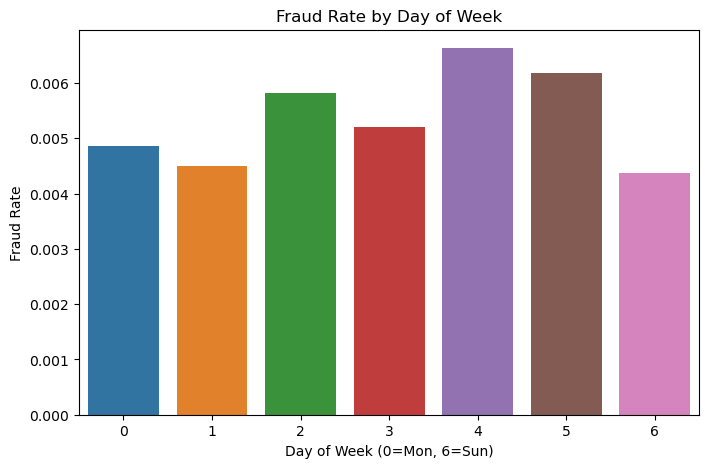

In [25]:
day_fraud_rate = df.groupby('trans_dayofweek')['is_fraud'].mean().reset_index()

plt.figure(figsize=(8,5))
sns.barplot(x='trans_dayofweek', y='is_fraud', data=day_fraud_rate)
plt.title('Fraud Rate by Day of Week')
plt.xlabel('Day of Week (0=Mon, 6=Sun)')
plt.ylabel('Fraud Rate')
plt.show()

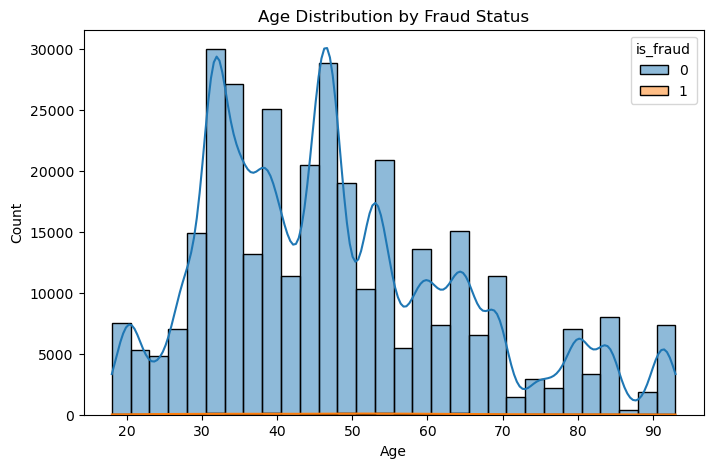

In [26]:
plt.figure(figsize=(8,5))
sns.histplot(data=df, x='age', hue='is_fraud', bins=30, kde=True, multiple='stack')
plt.title('Age Distribution by Fraud Status')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

In [27]:
# One-Hot Encode 'category' (drop_first=True to avoid dummy variable trap)
df = pd.get_dummies(df, columns=['category'], drop_first=True)

# Check the new columns after encoding
print("\n✅ After One-Hot Encoding:")
print(df.head())
print("\nColumns now:")
print(df.columns)



✅ After One-Hot Encoding:
      amt      lat      long  city_pop  merch_lat  merch_long  is_fraud  age  \
0  107.23  48.8878 -118.2105       149  49.159047 -118.186462         0   41   
1  220.11  42.1808 -112.2620      4154  43.150704 -112.154481         0   57   
2   96.29  41.6125 -122.5258       589  41.657520 -122.230347         0   74   
3    7.77  32.9396 -105.8189       899  32.863258 -106.520205         0   52   
4    6.85  43.0172 -111.0292       471  43.753735 -111.454923         0   52   

   trans_hour  trans_dayofweek  ...  category_grocery_pos  \
0           0                1  ...                     1   
1           0                1  ...                     0   
2           0                1  ...                     1   
3           0                1  ...                     0   
4           0                1  ...                     0   

   category_health_fitness  category_home  category_kids_pets  \
0                        0              0                   

In [28]:
from sklearn.preprocessing import StandardScaler

# List numeric columns to scale (adjust if needed)
numeric_cols = ['amt', 'age', 'trans_hour', 'trans_dayofweek', 'city_pop', 'merch_lat', 'merch_long', 'amount_per_age']

scaler = StandardScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

print("\n✅ Numeric features scaled.")
print(df[numeric_cols].head())




✅ Numeric features scaled.
        amt       age  trans_hour  trans_dayofweek  city_pop  merch_lat  \
0  0.226702 -0.398227    -1.88115        -0.893542 -0.365123   1.839876   
1  0.924893  0.543395    -1.88115        -0.893542 -0.351456   0.668861   
2  0.159035  1.543869    -1.88115        -0.893542 -0.363622   0.377842   
3 -0.388483  0.249138    -1.88115        -0.893542 -0.362564  -1.336143   
4 -0.394173  0.249138    -1.88115        -0.893542 -0.364024   0.786391   

   merch_long  amount_per_age  
0   -0.597291        0.233223  
1   -0.120981        0.548625  
2   -0.916613       -0.089118  
3    0.323925       -0.377944  
4   -0.065741       -0.382353  


In [29]:
from sklearn.model_selection import train_test_split

# Separate features and target
X = df.drop('is_fraud', axis=1)
y = df['is_fraud']

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"\n✅ Data split: {X_train.shape[0]} training samples and {X_test.shape[0]} testing samples.")


✅ Data split: 271685 training samples and 67922 testing samples.


In [36]:
import sys
print(sys.executable)

C:\Users\Admin\anaconda3\python.exe


In [38]:
from xgboost import XGBClassifier

In [39]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Initialize models
logreg = LogisticRegression(max_iter=1000, random_state=42)
rf = RandomForestClassifier(n_estimators=100, random_state=42)
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

# Train models
logreg.fit(X_train, y_train)
rf.fit(X_train, y_train)
xgb.fit(X_train, y_train)

# Predict on test set
y_pred_logreg = logreg.predict(X_test)
y_pred_rf = rf.predict(X_test)
y_pred_xgb = xgb.predict(X_test)

# Predict probabilities for ROC AUC
y_prob_logreg = logreg.predict_proba(X_test)[:,1]
y_prob_rf = rf.predict_proba(X_test)[:,1]
y_prob_xgb = xgb.predict_proba(X_test)[:,1]

# Evaluation function
def evaluate_model(name, y_true, y_pred, y_prob):
    print(f"--- {name} ---")
    print("Classification Report:")
    print(classification_report(y_true, y_pred))
    print("Confusion Matrix:")
    print(confusion_matrix(y_true, y_pred))
    print(f"ROC AUC Score: {roc_auc_score(y_true, y_prob):.4f}")
    print("\n")

# Evaluate all models
evaluate_model("Logistic Regression", y_test, y_pred_logreg, y_prob_logreg)
evaluate_model("Random Forest", y_test, y_pred_rf, y_prob_rf)
evaluate_model("XGBoost", y_test, y_pred_xgb, y_prob_xgb)

C:\Users\Admin\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [02:42:20] WARNING: C:\b\abs_d97hy_84m6\croot\xgboost-split_1749630932152\work\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


--- Logistic Regression ---
Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00     67566
           1       0.44      0.03      0.06       356

    accuracy                           0.99     67922
   macro avg       0.72      0.52      0.53     67922
weighted avg       0.99      0.99      0.99     67922

Confusion Matrix:
[[67552    14]
 [  345    11]]
ROC AUC Score: 0.8399


--- Random Forest ---
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     67566
           1       0.97      0.71      0.82       356

    accuracy                           1.00     67922
   macro avg       0.98      0.85      0.91     67922
weighted avg       1.00      1.00      1.00     67922

Confusion Matrix:
[[67558     8]
 [  105   251]]
ROC AUC Score: 0.9839


--- XGBoost ---
Classification Report:
              precision    recall  f1-score   support

          

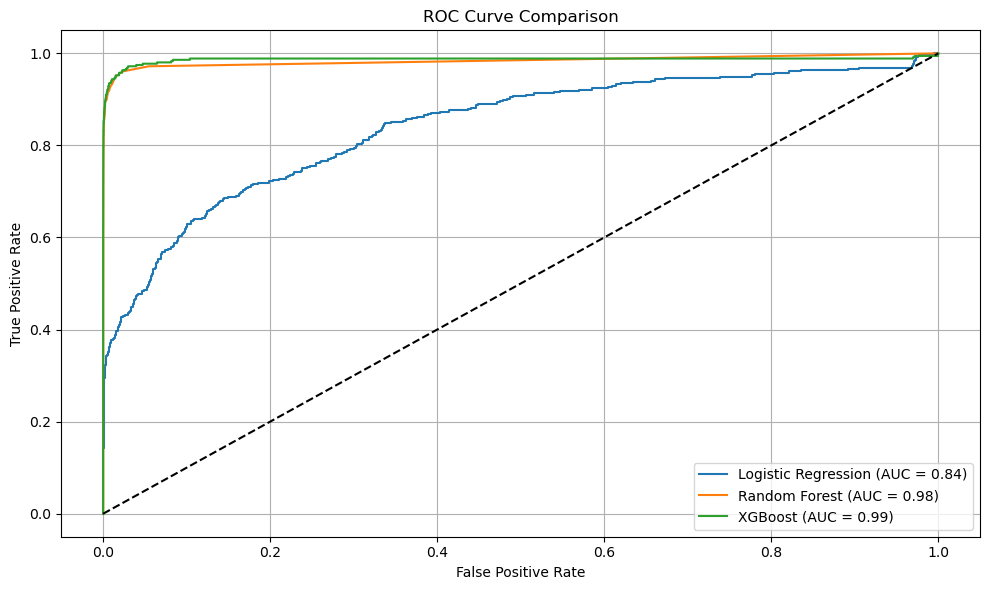

In [40]:
from sklearn.metrics import roc_curve, auc

# Calculate ROC curves and AUC scores
fpr_log, tpr_log, _ = roc_curve(y_test, y_prob_logreg)
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_rf)
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, y_prob_xgb)

roc_auc_log = auc(fpr_log, tpr_log)
roc_auc_rf = auc(fpr_rf, tpr_rf)
roc_auc_xgb = auc(fpr_xgb, tpr_xgb)

# Plot
plt.figure(figsize=(10, 6))
plt.plot(fpr_log, tpr_log, label=f'Logistic Regression (AUC = {roc_auc_log:.2f})')
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {roc_auc_rf:.2f})')
plt.plot(fpr_xgb, tpr_xgb, label=f'XGBoost (AUC = {roc_auc_xgb:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # Baseline
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()

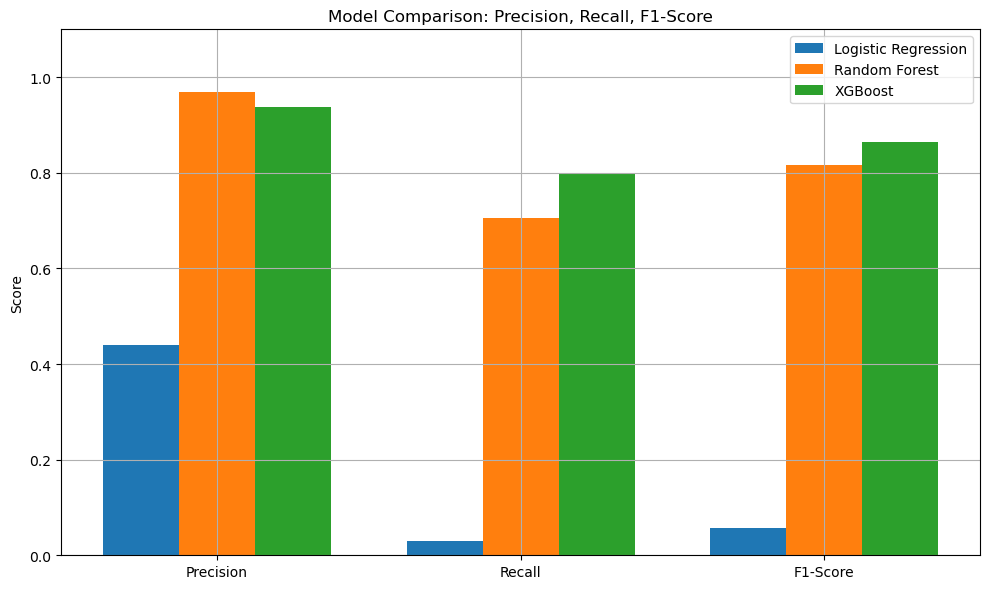

In [41]:
import numpy as np
from sklearn.metrics import precision_score, recall_score, f1_score

# Calculate metrics
precision_log = precision_score(y_test, y_pred_logreg)
recall_log = recall_score(y_test, y_pred_logreg)
f1_log = f1_score(y_test, y_pred_logreg)

precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)

precision_xgb = precision_score(y_test, y_pred_xgb)
recall_xgb = recall_score(y_test, y_pred_xgb)
f1_xgb = f1_score(y_test, y_pred_xgb)

# Group metrics
metrics = ['Precision', 'Recall', 'F1-Score']
log_scores = [precision_log, recall_log, f1_log]
rf_scores = [precision_rf, recall_rf, f1_rf]
xgb_scores = [precision_xgb, recall_xgb, f1_xgb]

# Bar chart
x = np.arange(len(metrics))
width = 0.25

plt.figure(figsize=(10, 6))
plt.bar(x - width, log_scores, width=width, label='Logistic Regression')
plt.bar(x, rf_scores, width=width, label='Random Forest')
plt.bar(x + width, xgb_scores, width=width, label='XGBoost')

# Chart settings
plt.xticks(x, metrics)
plt.ylim(0, 1.1)
plt.title('Model Comparison: Precision, Recall, F1-Score')
plt.ylabel('Score')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [42]:
from sklearn.model_selection import RandomizedSearchCV

# Define hyperparameter space
rf_params = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Setup the search
rf_random_search = RandomizedSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_distributions=rf_params,
    n_iter=10,  # Number of combinations to try
    cv=3,
    scoring='roc_auc',
    verbose=1,
    n_jobs=-1
)

# Fit search on training data
rf_random_search.fit(X_train, y_train)

# Best model
best_rf = rf_random_search.best_estimator_

Fitting 3 folds for each of 10 candidates, totalling 30 fits


In [44]:
from sklearn.model_selection import RandomizedSearchCV

# Define hyperparameter space
xgb_params = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.7, 0.8, 1.0],
    'colsample_bytree': [0.7, 0.8, 1.0]
}

# Setup the search
xgb_random_search = RandomizedSearchCV(
    estimator=XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
    param_distributions=xgb_params,
    n_iter=10,
    cv=3,
    scoring='roc_auc',
    verbose=1,
    n_jobs=-1
)

# Fit search
xgb_random_search.fit(X_train, y_train)

# Best model
best_xgb = xgb_random_search.best_estimator_

Fitting 3 folds for each of 10 candidates, totalling 30 fits


C:\Users\Admin\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [03:19:04] WARNING: C:\b\abs_d97hy_84m6\croot\xgboost-split_1749630932152\work\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [45]:
# Predict and evaluate tuned RF
y_pred_rf_tuned = best_rf.predict(X_test)
y_prob_rf_tuned = best_rf.predict_proba(X_test)[:, 1]
evaluate_model("Tuned Random Forest", y_test, y_pred_rf_tuned, y_prob_rf_tuned)

# Predict and evaluate tuned XGB
y_pred_xgb_tuned = best_xgb.predict(X_test)
y_prob_xgb_tuned = best_xgb.predict_proba(X_test)[:, 1]
evaluate_model("Tuned XGBoost", y_test, y_pred_xgb_tuned, y_prob_xgb_tuned)

--- Tuned Random Forest ---
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     67566
           1       0.96      0.68      0.80       356

    accuracy                           1.00     67922
   macro avg       0.98      0.84      0.90     67922
weighted avg       1.00      1.00      1.00     67922

Confusion Matrix:
[[67557     9]
 [  113   243]]
ROC AUC Score: 0.9931


--- Tuned XGBoost ---
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     67566
           1       0.96      0.80      0.87       356

    accuracy                           1.00     67922
   macro avg       0.98      0.90      0.94     67922
weighted avg       1.00      1.00      1.00     67922

Confusion Matrix:
[[67554    12]
 [   71   285]]
ROC AUC Score: 0.9985


